In [1]:
#Téléchargement du fichier cif
from pymatgen.ext.matproj import MPRester
with MPRester ("Js0y7wlKAQ1kbIXr") as m:
    structure = m.get_structure_by_material_id("mp-11601")

Pics,indices hkl,d_hkl,2$\theta$,Intensité
Premier pic,"[{'hkl': (1, 1, 1), 'multiplicity': 2}]",5.571253387107564,15.894313860384042,100.0
Second pic,"[{'hkl': (1, 0, 0), 'multiplicity': 6}]",2.890434200336151,30.911352183844127,51.345716113615715
Troisième pic,"[{'hkl': (2, 2, 2), 'multiplicity': 2}]",2.785626693553782,32.105169550237214,21.01170458735958


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

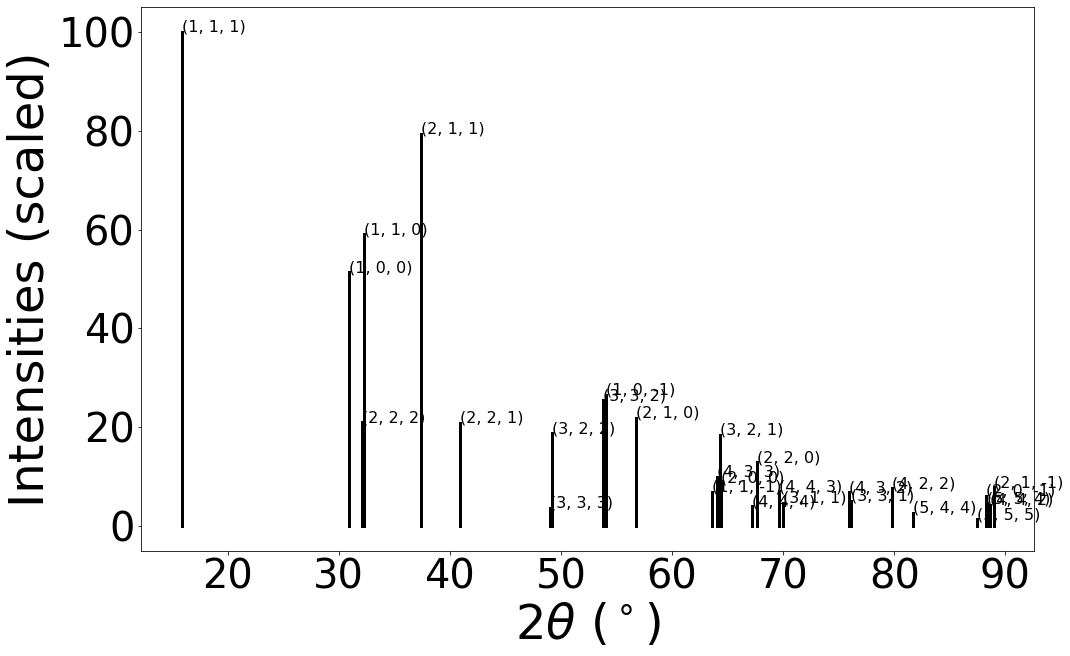

In [10]:
# Etudier l’effet de 3 éléments de symétrie différents (pas l’identité) chacun pour 1 atome différent
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display
import tabulate

s = SpacegroupAnalyzer(structure)
new_s = s.get_conventional_standard_structure()

xrd_objet = XRDCalculator(wavelength='CuKa1',symprec=0, debye_waller_factors=None)

xrd_calcule = xrd_objet.get_pattern(structure=structure, scaled = True, two_theta_range=(0,90))



table = [["Pics","indices hkl","d_hkl",r'2$\theta$',"Intensité"],
         ["Premier pic",xrd_calcule.hkls[0],xrd_calcule.d_hkls[0],xrd_calcule.x[0],xrd_calcule.y[0]],
         ["Second pic",xrd_calcule.hkls[1],xrd_calcule.d_hkls[1],xrd_calcule.x[1],xrd_calcule.y[1]],
         ["Troisième pic",xrd_calcule.hkls[2],xrd_calcule.d_hkls[2],xrd_calcule.x[2],xrd_calcule.y[2]]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))
xrd_objet.get_plot(structure)